# pandas exploration
In this assignment you will select a data set and do some munging and analysis of it using `pandas`, Jupyter Notebooks, and associated Python-centric data science tools.

## Set up environment

The following lines ensure that `numpy` and `pandas` are installed in the notebook environment.  Depending on your system, this may not be necessary and may be removed.

In [1]:
!pip install numpy
!pip install pandas

Import the core data science libraries:

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

/Users/jiminlee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/jiminlee/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/var/folders/c0/0c_b64hn65zc4mh0lkr4wn_00000gn/T/ipykernel_93360/35659034.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  im

## Import the raw data
In this section, you will import the raw data into a `pandas` DataFrame.

In [3]:
df = pd.read_csv("data/NYPD_Shooting_Incident_Data__Year_To_Date__20240428.csv")

## Data inspection
In this section, you will show enough of your data for a viewer to get a general sense of how the data is structured and any unique features of it.  Complete each of the indicated tasks in a Code cell, making sure to include a Markdown cell above each Code cell that explains what is being shown by the code.  
- Show 5 rows, selected at random, from the data set.
- Show each of the column names and their data types.
- Show any unique features of your chosen data set.

Feel free to add as many additional cells as you need to help explain the raw data.

### 1. Show 5 rows, selected at random, from the data set:

In [4]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,283390056,03/07/2024,17:15:00,BROOKLYN,OUTSIDE,73,0,STREET,(null),N,...,M,BLACK,18-24,M,BLACK,1008245,183796,NaN,NaN,NaN
1,283404608,03/07/2024,16:14:00,BRONX,OUTSIDE,40,0,STREET,(null),Y,...,M,BLACK,<18,M,BLACK,1005028,234516,NaN,NaN,NaN
2,281250471,01/27/2024,18:36:00,BROOKLYN,OUTSIDE,75,0,STREET,(null),N,...,(null),(null),25-44,M,BLACK,1015391,181282,40.664200,-73.887750,POINT (-73.88775 40.6642)
3,283951187,03/18/2024,22:00:00,QUEENS,OUTSIDE,103,0,DWELLING,PVT HOUSE,N,...,(null),(null),25-44,M,BLACK,1042419,193657,40.698032,-73.790219,POINT (-73.790219 40.698032)
4,279799858,01/01/2024,14:57:00,BRONX,OUTSIDE,52,0,STREET,(null),N,...,M,BLACK HISPANIC,18-24,M,WHITE HISPANIC,1014086,254305,40.864633,-73.892131,POINT (-73.89213149135563 40.86463266264929)


### 2. Show shape(number of rows and columns) of dataframe:

In [5]:
print(df.shape)

(232, 21)


### 3. Show each of the column names and their data types:

In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232 entries, 0 to 231
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   INCIDENT_KEY              232 non-null    int64  
 1   OCCUR_DATE                232 non-null    object 
 2   OCCUR_TIME                232 non-null    object 
 3   BORO                      232 non-null    object 
 4   LOC_OF_OCCUR_DESC         232 non-null    object 
 5   PRECINCT                  232 non-null    int64  
 6   JURISDICTION_CODE         232 non-null    int64  
 7   LOC_CLASSFCTN_DESC        232 non-null    object 
 8   LOCATION_DESC             232 non-null    object 
 9   STATISTICAL_MURDER_FLAG   232 non-null    object 
 10  PERP_AGE_GROUP            232 non-null    object 
 11  PERP_SEX                  232 non-null    object 
 12  PERP_RACE                 232 non-null    object 
 13  VIC_AGE_GROUP             232 non-null    object 
 14  VIC_SEX   

It's worth noting that there are rows listed as 'non-null' while we can clearly see some (null) values in the random five rows that were displayed in Data Inspection 1.

## Data munging
Place your **data munging** code and documentation within this section.  
- Keep each of your Code cells short and focused on a single task.  
- Include a Markdown cell above each code cell that describes what task the code within the code cell is performing.
- Make as many code cells as you need to complete the munging - a few have been created for you to start with.
- Display 5 sample rows of the modified data after each transformation so a viewer can see how the data has changed.

**Note**: If you believe that your data set does not require any munging, please explain in detail.  Create Markdown cells that explain your thinking and create Code cells that show any specific structures of the data you refer to in your explanation.

### 1. Convert '(null)' to actual Pandas NaN value.

There are clearly 'null' values as well as NaN values listed in the five rows that were displayed in data inspection(and presumably more later in the dataframe), but they were not reflected in the overview in inspection question 3. We need to go through them and replace them with actual Pandas NaN values.

In [7]:
df.replace('(null)', np.nan, inplace=True)

Result:

In [8]:
df.head()

,INCIDENT_KEY,OCCUR_DATE,OCCUR_TIME,BORO,LOC_OF_OCCUR_DESC,PRECINCT,JURISDICTION_CODE,LOC_CLASSFCTN_DESC,LOCATION_DESC,STATISTICAL_MURDER_FLAG,...,PERP_SEX,PERP_RACE,VIC_AGE_GROUP,VIC_SEX,VIC_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,283390056,03/07/2024,17:15:00,BROOKLYN,OUTSIDE,73,0,STREET,NaN,N,...,M,BLACK,18-24,M,BLACK,1008245,183796,NaN,NaN,NaN
1,283404608,03/07/2024,16:14:00,BRONX,OUTSIDE,40,0,STREET,NaN,Y,...,M,BLACK,<18,M,BLACK,1005028,234516,NaN,NaN,NaN
2,281250471,01/27/2024,18:36:00,BROOKLYN,OUTSIDE,75,0,STREET,NaN,N,...,NaN,NaN,25-44,M,BLACK,1015391,181282,40.664200,-73.887750,POINT (-73.88775 40.6642)
3,283951187,03/18/2024,22:00:00,QUEENS,OUTSIDE,103,0,DWELLING,PVT HOUSE,N,...,NaN,NaN,25-44,M,BLACK,1042419,193657,40.698032,-73.790219,POINT (-73.790219 40.698032)
4,279799858,01/01/2024,14:57:00,BRONX,OUTSIDE,52,0,STREET,NaN,N,...,M,BLACK HISPANIC,18-24,M,WHITE HISPANIC,1014086,254305,40.864633,-73.892131,POINT (-73.89213149135563 40.86463266264929)


#### 1-1. Decide what to do with NaN values.

In [9]:
df.isnull().sum(axis = 0)

INCIDENT_KEY                  0
OCCUR_DATE                    0
OCCUR_TIME                    0
BORO                          0
LOC_OF_OCCUR_DESC             0
PRECINCT                      0
JURISDICTION_CODE             0
LOC_CLASSFCTN_DESC            1
LOCATION_DESC               150
STATISTICAL_MURDER_FLAG       0
PERP_AGE_GROUP               99
PERP_SEX                     99
PERP_RACE                    99
VIC_AGE_GROUP                 0
VIC_SEX                       0
VIC_RACE                      0
X_COORD_CD                    0
Y_COORD_CD                    0
Latitude                      6
Longitude                     6
New Georeferenced Column      6
dtype: int64

There seems to be multiple columns that contain a high number of NaN values(≥99), so unless I decide to keep those columns out of analysis, dropping all rows that contain NaN doesn't seem to be an option. The columns with high number of NaN values also seem quite relevant and useful for data analysis, so I will not be dropping any rows or columns based on NaN; thankfully, Pandas does a good job to deal with NaN values in descriptive statistics and analysis. I will leave the NaN as they are.

### 2. Clean column names.

They're inconsistent!

In [10]:
df.columns = [x.lower() for x in df.columns] # Lowercase
df.columns = df.columns.str.replace(' ', '_') # Replace space with underscore

Result:

In [11]:
df.head()

,incident_key,occur_date,occur_time,boro,loc_of_occur_desc,precinct,jurisdiction_code,loc_classfctn_desc,location_desc,statistical_murder_flag,...,perp_sex,perp_race,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,new_georeferenced_column
0,283390056,03/07/2024,17:15:00,BROOKLYN,OUTSIDE,73,0,STREET,NaN,N,...,M,BLACK,18-24,M,BLACK,1008245,183796,NaN,NaN,NaN
1,283404608,03/07/2024,16:14:00,BRONX,OUTSIDE,40,0,STREET,NaN,Y,...,M,BLACK,<18,M,BLACK,1005028,234516,NaN,NaN,NaN
2,281250471,01/27/2024,18:36:00,BROOKLYN,OUTSIDE,75,0,STREET,NaN,N,...,NaN,NaN,25-44,M,BLACK,1015391,181282,40.664200,-73.887750,POINT (-73.88775 40.6642)
3,283951187,03/18/2024,22:00:00,QUEENS,OUTSIDE,103,0,DWELLING,PVT HOUSE,N,...,NaN,NaN,25-44,M,BLACK,1042419,193657,40.698032,-73.790219,POINT (-73.790219 40.698032)
4,279799858,01/01/2024,14:57:00,BRONX,OUTSIDE,52,0,STREET,NaN,N,...,M,BLACK HISPANIC,18-24,M,WHITE HISPANIC,1014086,254305,40.864633,-73.892131,POINT (-73.89213149135563 40.86463266264929)


### 3. Clarify some columns.

#### 3-1. Clarify 'jurisdiction_code'

This column contains numerical codes that does not make intuitive sense to the viewer; I will convert them to string values so it's easier for viewers to understand, using the footnotes in the original data source.

In [12]:
# I replaced the data with string in all caps to keep the consistency with other columns,
# which all seem to have string values capitalized.

df['jurisdiction_code'].replace(0, 'PATROL', inplace = True)
df['jurisdiction_code'].replace(1, 'TRANSIT', inplace = True)
df['jurisdiction_code'].replace(2, 'HOUSING', inplace = True)
df['jurisdiction_code'].replace(3, 'NON-NYPD', inplace = True)

/var/folders/c0/0c_b64hn65zc4mh0lkr4wn_00000gn/T/ipykernel_93360/2706372855.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['jurisdiction_code'].replace(0, 'PATROL', inplace = True)


Result:

In [13]:
df['jurisdiction_code'].unique()

array(['PATROL', 'TRANSIT', 'HOUSING'], dtype=object)

In [14]:
df.head()

,incident_key,occur_date,occur_time,boro,loc_of_occur_desc,precinct,jurisdiction_code,loc_classfctn_desc,location_desc,statistical_murder_flag,...,perp_sex,perp_race,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,new_georeferenced_column
0,283390056,03/07/2024,17:15:00,BROOKLYN,OUTSIDE,73,PATROL,STREET,NaN,N,...,M,BLACK,18-24,M,BLACK,1008245,183796,NaN,NaN,NaN
1,283404608,03/07/2024,16:14:00,BRONX,OUTSIDE,40,PATROL,STREET,NaN,Y,...,M,BLACK,<18,M,BLACK,1005028,234516,NaN,NaN,NaN
2,281250471,01/27/2024,18:36:00,BROOKLYN,OUTSIDE,75,PATROL,STREET,NaN,N,...,NaN,NaN,25-44,M,BLACK,1015391,181282,40.664200,-73.887750,POINT (-73.88775 40.6642)
3,283951187,03/18/2024,22:00:00,QUEENS,OUTSIDE,103,PATROL,DWELLING,PVT HOUSE,N,...,NaN,NaN,25-44,M,BLACK,1042419,193657,40.698032,-73.790219,POINT (-73.790219 40.698032)
4,279799858,01/01/2024,14:57:00,BRONX,OUTSIDE,52,PATROL,STREET,NaN,N,...,M,BLACK HISPANIC,18-24,M,WHITE HISPANIC,1014086,254305,40.864633,-73.892131,POINT (-73.89213149135563 40.86463266264929)


#### 3.2. Convert 'statistical_murder_flag' to boolean values

This column contains either the string 'Y' or 'N' to describe if the shooting resulted in the victim's death. For the sake of easier analysis, I will change these to boolean values of True and False which Python automatically understands.

In [15]:
df['statistical_murder_flag'].replace('Y', True, inplace = True)
df['statistical_murder_flag'].replace('N', False, inplace = True)

/var/folders/c0/0c_b64hn65zc4mh0lkr4wn_00000gn/T/ipykernel_93360/1087760077.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['statistical_murder_flag'].replace('Y', True, inplace = True)
/var/folders/c0/0c_b64hn65zc4mh0lkr4wn_00000gn/T/ipykernel_93360/1087760077.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [16]:
df.head()

,incident_key,occur_date,occur_time,boro,loc_of_occur_desc,precinct,jurisdiction_code,loc_classfctn_desc,location_desc,statistical_murder_flag,...,perp_sex,perp_race,vic_age_group,vic_sex,vic_race,x_coord_cd,y_coord_cd,latitude,longitude,new_georeferenced_column
0,283390056,03/07/2024,17:15:00,BROOKLYN,OUTSIDE,73,PATROL,STREET,NaN,False,...,M,BLACK,18-24,M,BLACK,1008245,183796,NaN,NaN,NaN
1,283404608,03/07/2024,16:14:00,BRONX,OUTSIDE,40,PATROL,STREET,NaN,True,...,M,BLACK,<18,M,BLACK,1005028,234516,NaN,NaN,NaN
2,281250471,01/27/2024,18:36:00,BROOKLYN,OUTSIDE,75,PATROL,STREET,NaN,False,...,NaN,NaN,25-44,M,BLACK,1015391,181282,40.664200,-73.887750,POINT (-73.88775 40.6642)
3,283951187,03/18/2024,22:00:00,QUEENS,OUTSIDE,103,PATROL,DWELLING,PVT HOUSE,False,...,NaN,NaN,25-44,M,BLACK,1042419,193657,40.698032,-73.790219,POINT (-73.790219 40.698032)
4,279799858,01/01/2024,14:57:00,BRONX,OUTSIDE,52,PATROL,STREET,NaN,False,...,M,BLACK HISPANIC,18-24,M,WHITE HISPANIC,1014086,254305,40.864633,-73.892131,POINT (-73.89213149135563 40.86463266264929)


#### 3-3. Keep/discard columns.

Not all of the columns are relevant to analysis; for example, timestamp and location coordinates are coded values that represent a location but do not mean much as numbers themselves(ex: averaging the 'values' of coordinates will not yield a meaningful value). However, a reader may find those information useful when they are browsing individual data points in/out of analysis, so I will keep them - especially as this is not a dataset with tens of thousands of rows that need memory optimization.

## Data analysis
Place your **data analysis** code and documentation within this section.
- Perform at least 5 different statistical or other analyses of different aspects of the data.
    - Your analyses must be specific and relevant to your chosen data set and show interesting aspects of it.
    - Include at least one analysis that includes grouping rows by a shared attribute and performing some kind of statistical analysis on each group.
    - Sort the data in at least 1 of your analyses, but sort on its own does not constitute an analysis on its own.
- Keep each of your Code cells short and focused on a single task.
- Include a Markdown cell above each Code cell that describes what task the code within the Code cell is performing.
- Make as many code cells as you need to complete the analysis - a few have been created for you to start with.

### 1. View number of shooting incidents by borough

In [17]:
df.groupby('boro').size()

boro
BRONX            104
BROOKLYN          64
MANHATTAN         33
QUEENS            26
STATEN ISLAND      5
dtype: int64

#### 1-1. Analyze each borough by the location where the shooting incidents happened

In [18]:
df.groupby(['boro','location_desc']).size()

boro           location_desc            
BRONX          BAR/NIGHT CLUB                1
               COMMERCIAL BLDG               1
               GROCERY/BODEGA                5
               HOTEL/MOTEL                   1
               MULTI DWELL - APT BUILD      13
               MULTI DWELL - PUBLIC HOUS    10
               SMALL MERCHANT                2
BROOKLYN       CHAIN STORE                   1
               GROCERY/BODEGA                3
               HOSPITAL                      1
               MULTI DWELL - APT BUILD       9
               MULTI DWELL - PUBLIC HOUS    10
               PVT HOUSE                     1
MANHATTAN      BAR/NIGHT CLUB                1
               MULTI DWELL - APT BUILD       2
               MULTI DWELL - PUBLIC HOUS     3
               SOCIAL CLUB/POLICY LOCATI     1
QUEENS         BAR/NIGHT CLUB                3
               GAS STATION                   2
               GROCERY/BODEGA                2
               MULT

### 2. Some analysis about the Bronx...

Bronx has the highest number of shooting incidents. Let's do some further analysis about Bronx.

#### 2-1. View perpetrators' age groups in shootings in the Bronx

In [19]:
bronxdf = df[df['boro'] == 'BRONX'] # Create a separate dataframe containing data only from the Bronx
bronxdf.groupby('perp_age_group').size()

perp_age_group
18-24    11
25-44    33
45-64     4
<18      16
dtype: int64

#### 2-2. View victims' age groups in shootings in the Bronx

In [20]:
bronxdf.groupby('vic_age_group').size()

vic_age_group
18-24    28
25-44    46
45-64     9
65+       2
<18      19
dtype: int64

### 3. View number of shooting incidents by setting

In [21]:
df.groupby('loc_classfctn_desc').size()

loc_classfctn_desc
COMMERCIAL      21
DWELLING        30
HOUSING         27
OTHER            2
PARKING LOT      1
STREET         136
TRANSIT         14
dtype: int64

### 4. Some analysis about street shootings...

Seems like most shooting incidents are happening on the streets. Let's do some analysis.

#### 4-1. Street shootings by borough

In [22]:
streetdf = df[df['loc_classfctn_desc'] == 'STREET'] # Create a separate dataframe containing data only about shooting incidents on the streets
streetdf.groupby('boro').size()

boro
BRONX            59
BROOKLYN         35
MANHATTAN        24
QUEENS           15
STATEN ISLAND     3
dtype: int64

#### 4-2. Percentages of street shootings in each borough

The order of boroughs from most to least shooting incidents seems to be consistent with Analysis 1 where the order was the Bronx-Brooklyn-Manhattan-Queens-Staten Island, but it doesn't tell us much if there is any difference. Let's take a look at the percentage of shooting incidents on the streets relative to all shooting incidents by borough.

In [23]:
bystreetboro = streetdf.groupby('boro').size() # Separate dataframe about street shootings in each borough
byboro = df.groupby('boro').size() # Separate dataframe about shooting incident counts in each borough

percseries = (bystreetboro/byboro) * 100 # New Pandas Series containing street shooting percentage of each borough
percdf = percseries.to_frame().reset_index() # Turn Series into Dataframe
percdf = percdf.rename(columns= {0: 'percentage'})
percdf.sort_values(by='percentage', ascending=False) # Sort by descending order of street shooting percentage.

,boro,percentage
2,MANHATTAN,72.727273
4,STATEN ISLAND,60.000000
3,QUEENS,57.692308
0,BRONX,56.730769
1,BROOKLYN,54.687500


It's interesting to see that the percentage of street shootings don't necessarily line up with the number of shooting incidents. While Manhattan ranks third in the overall number of shooting incidents, about 73% of those seem to be happening on the streets, which is the highest percentage among all five boroughs.

### 5. View number of fatal shootings

In [24]:
df.groupby('statistical_murder_flag').size()

statistical_murder_flag
False    179
True      53
dtype: int64

#### 5-1. Percentage of fatal shootings among all incidents

In [25]:
df['statistical_murder_flag'].value_counts(normalize=True).mul(100)

statistical_murder_flag
False    77.155172
True     22.844828
Name: proportion, dtype: float64

Seems like about 23% of all shooting incidents in 2024 that happened in NYC on record resulted in fatality.

## Data visualization
In this section, you will create a few **visualizations** that show some of the insights you have gathered from this data.
- Create at least 5 different visualizations, where each visualization shows different insights into the data.
- Use at least 3 different visualization types (e.g. bar charts, line charts, stacked area charts, pie charts, etc)
- Create a Markdown cell and a Code cell for each, where you explain and show the visualizations, respectively.
- Create as many additional cells as you need to prepare the data for the visualizations.

### 1. Pie chart of shooting incident location distribution among the five boroughs

<AxesSubplot:>

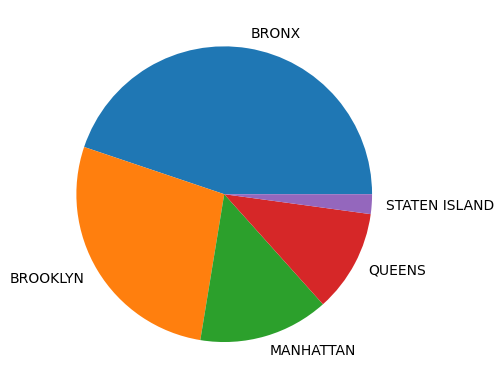

In [26]:
df.groupby(['boro']).size().plot(kind='pie')

### 2. Pie Chart of shooting incident by location classification

<AxesSubplot:>

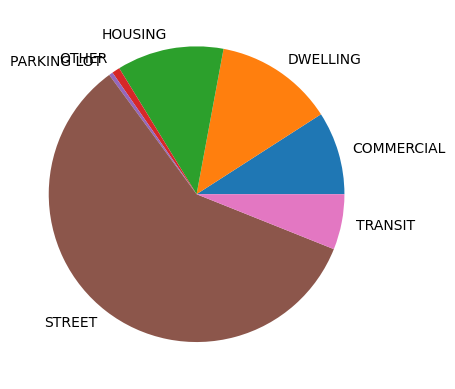

In [27]:
df.groupby(['loc_classfctn_desc']).size().plot(kind='pie')

### 3. Bar graph of perpetrators' age group in the Bronx

#### 3-1. Fix some organizational issue:

The column 'perp_age_group' contains instances of the value '<18'. Since '<' is a special character, when put into a plot, matplotlib will push the '<18' age group bar all the way to the right, which is not very intuitive. In order to reorder the bars, I created a new dataframe to manually reorder the rows before plotting.

In [28]:
bronxageseries = bronxdf.groupby('perp_age_group').size()
bronxagedf = bronxageseries.to_frame().reset_index()
bronxagedf = bronxagedf.rename(columns= {0: 'count'})
bronxageorderdf = bronxagedf.reindex([3,0,1,2]) # Reorder by index, with '<18' coming first

#### 3-2. Plot graph!

<AxesSubplot:xlabel='perp_age_group'>

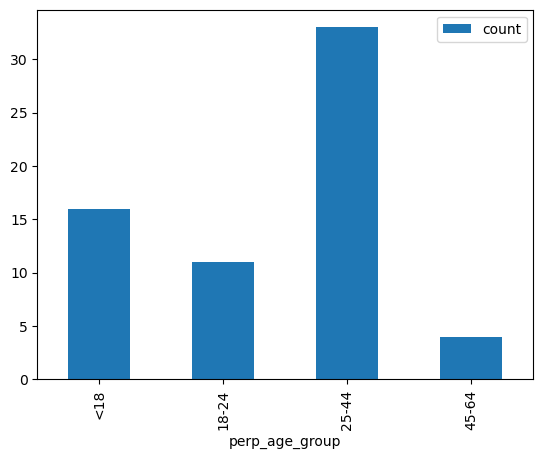

In [29]:
bronxageorderdf.plot.bar(x = 'perp_age_group',y = 'count') 

### 4. Line graph of monthly cumulative shooting incident counts

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90.]),
 [Text(-10.0, 0, '03/21/2024'),
  Text(0.0, 0, '01/01/2024'),
  Text(10.0, 0, '01/14/2024'),
  Text(20.0, 0, '01/24/2024'),
  Text(30.0, 0, '02/05/2024'),
  Text(40.0, 0, '02/16/2024'),
  Text(50.0, 0, '02/29/2024'),
  Text(60.0, 0, '03/11/2024'),
  Text(70.0, 0, '03/21/2024'),
  Text(80.0, 0, ''),
  Text(90.0, 0, '')])

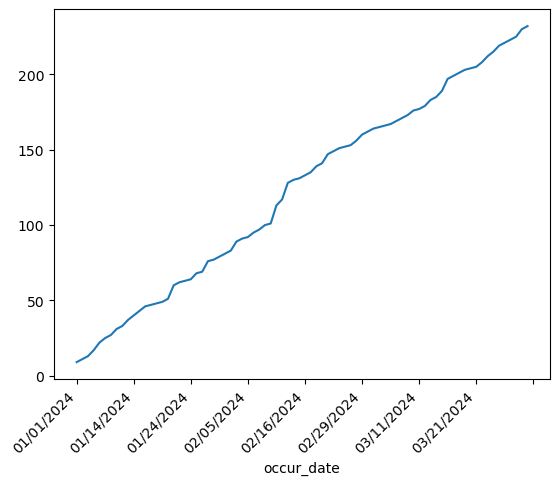

In [30]:
df.groupby('occur_date').size().cumsum().plot(x='occur_date')
plt.xticks(rotation=45, ha="right")
# Tutor: how to display months in x axis like example?

### 5. Bar graph with perpetrator and victim race

#### 5-1. Create dataframe combining perpetrator and victim race

In [31]:
perpraceseries = df.groupby(['perp_race']).size()
vicraceseries = df.groupby(['vic_race']).size()

# Create new dataframe with both perpetrator and victim races
racedf = pd.DataFrame({
    'perp_count':perpraceseries,
    'vic_count':vicraceseries})

racedf = racedf.rename_axis('race')
racedf

,perp_count,vic_count
race,,
AMERICAN INDIAN/ALASKAN NATIVE,NaN,1
ASIAN / PACIFIC ISLANDER,4.0,6
BLACK,63.0,147
BLACK HISPANIC,33.0,29
WHITE,1.0,3
WHITE HISPANIC,32.0,46


#### 5-2. Plot graph!

<AxesSubplot:xlabel='race'>

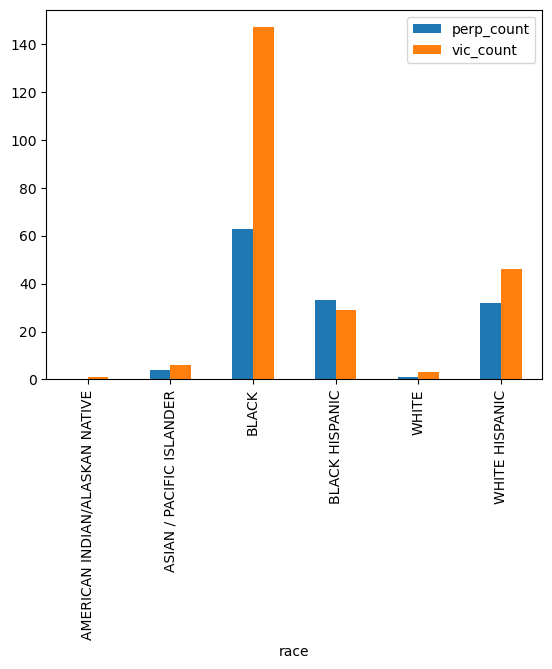

In [32]:
racedf.plot.bar()

It's worth noting that pieces of information on a considerable portion of the perpetrators are missing, while documentations about the victims are quite consistent.